In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import dmba
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:.7f}'.format


In [3]:
#Load the sales data
sales_df=pd.read_csv('SalesData.csv')
sales_df.head()

,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr
0,H-1,USA,6,128.2500000,769.5000000,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.2500000,11.5425000
1,H-1,USA,6,117.0000000,702.0000000,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC,117.0000000,10.5300000
2,H-1,USA,7,88.0000000,616.0000000,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC,88.0000000,7.9200000
3,H-1,USA,7,88.0000000,616.0000000,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC,88.0000000,7.9200000
4,H-1,USA,5,117.0000000,585.0000000,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC,117.0000000,10.5300000


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerCode  13135 non-null  object 
 1   CountryName   13135 non-null  object 
 2   QtyRequired   13135 non-null  int64  
 3   TotalArea     13135 non-null  float64
 4   Amount        13135 non-null  float64
 5   ITEM_NAME     13135 non-null  object 
 6   QualityName   13135 non-null  object 
 7   DesignName    13135 non-null  object 
 8   ColorName     13135 non-null  object 
 9   ShapeName     13135 non-null  object 
 10  AreaFt        13135 non-null  float64
 11  AreaMtr       13135 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [5]:
sales_df.isna().sum()

CustomerCode    0
CountryName     0
QtyRequired     0
TotalArea       0
Amount          0
ITEM_NAME       0
QualityName     0
DesignName      0
ColorName       0
ShapeName       0
AreaFt          0
AreaMtr         0
dtype: int64

In [6]:
sales_df.describe()

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr
count,13135.0000000,13135.0000000,13135.0000000,13135.0000000,13135.0000000
mean,44.4606014,44.7313699,2392.0401637,54.6223692,4.9517396
std,228.7495346,50.0995972,16832.0910796,49.0727674,4.4559331
min,1.0000000,0.0400000,0.0000000,0.4444000,0.0400000
25%,3.0000000,5.8000000,163.2000000,15.0000000,1.3500000
50%,8.0000000,24.0000000,590.6250000,40.0000000,3.6000000
75%,20.0000000,80.0000000,1540.0000000,80.0000000,7.2000000
max,6400.0000000,1024.0000000,599719.6800000,645.7222000,60.0000000


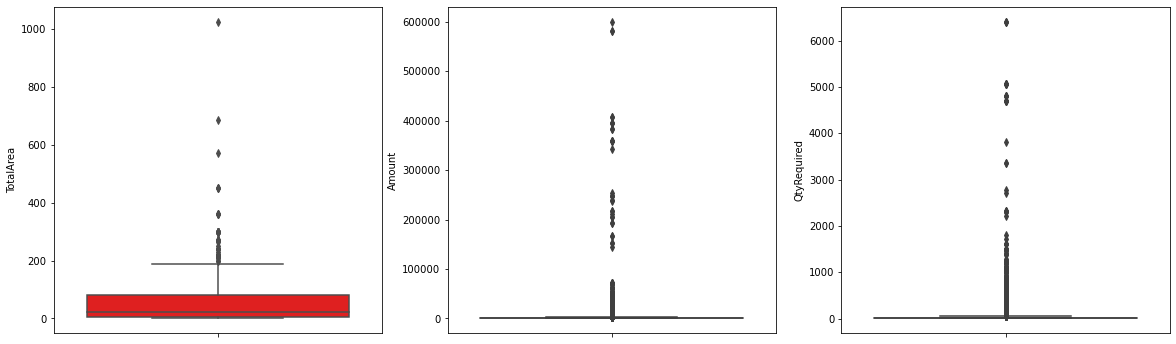

In [7]:
#box plot for TotalArea,Amount,QtyRequired
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(y=sales_df["TotalArea"], color="red")
plt.subplot(1,3,2)
sns.boxplot(y=sales_df["Amount"])
plt.subplot(1,3,3)
sns.boxplot(y=sales_df["QtyRequired"])
plt.show()

In [8]:
sales_df.corr()

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr
QtyRequired,1.0000000,-0.0961418,0.1097048,-0.1239269,-0.1237462
TotalArea,-0.0961418,1.0000000,0.0656406,0.8286136,0.8213057
Amount,0.1097048,0.0656406,1.0000000,0.0544993,0.0542271
AreaFt,-0.1239269,0.8286136,0.0544993,1.0000000,0.9997953
AreaMtr,-0.1237462,0.8213057,0.0542271,0.9997953,1.0000000


Text(0, 0.5, 'Count')

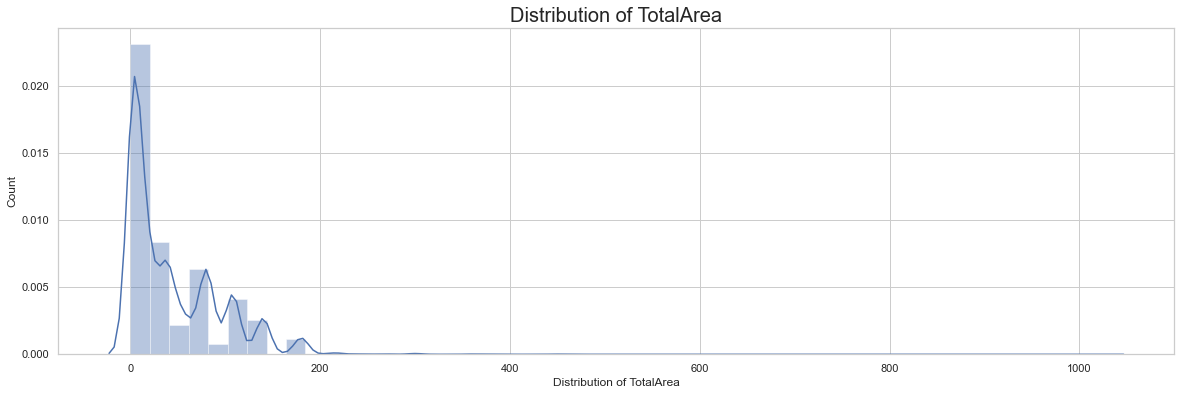

In [9]:
#Distribution of Area
plt.figure(figsize=(20, 6))
sns.set(style = 'whitegrid')
sns.distplot(sales_df['TotalArea'])
plt.title('Distribution of TotalArea', fontsize = 20)
plt.xlabel('Distribution of TotalArea')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

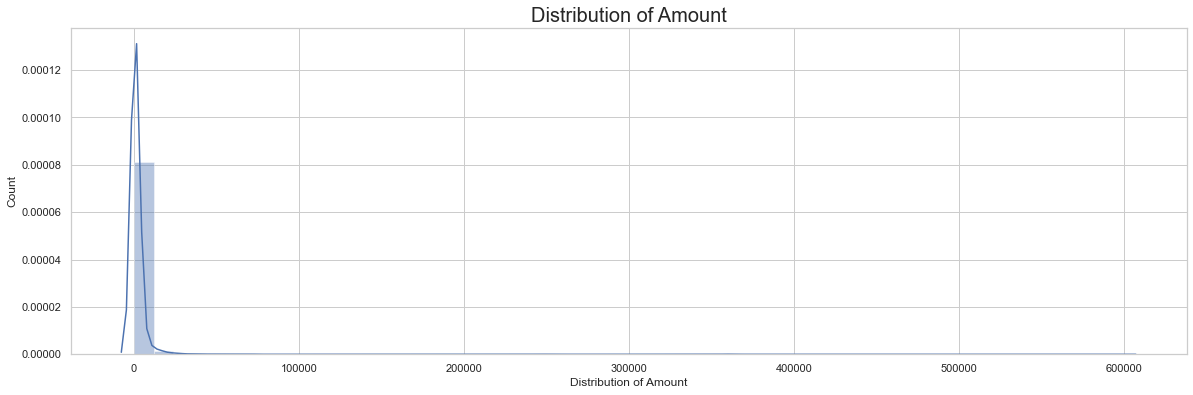

In [10]:
#Distribution of Amount
plt.figure(figsize=(20, 6))
sns.set(style = 'whitegrid')
sns.distplot(sales_df['Amount'])
plt.title('Distribution of Amount', fontsize = 20)
plt.xlabel('Distribution of Amount')
plt.ylabel('Count')

# EDA based on CountryName

In [11]:
#Total number of customers
len(sales_df['CustomerCode'].unique())

45

In [12]:
#the top 10 customers in term of the number of order records
sales_df['CustomerCode'].value_counts(normalize=True).head(10)

M-1   0.1811953
P-5   0.1417587
A-9   0.0893034
JL    0.0816901
C-1   0.0805482
TGT   0.0463647
T-2   0.0419490
H-2   0.0362391
I-2   0.0331938
T-5   0.0318234
Name: CustomerCode, dtype: float64

In [13]:
#classify customercode by country 
country_name = ['USA', 'ITALY', 'UK', 'AUSTRALIA', 'SOUTH AFRICA', 'BELGIUM',
       'BRAZIL', 'CHINA', 'CANADA', 'ROMANIA', 'ISRAEL', 'LEBANON',
       'INDIA', 'UAE']
for i in country_name:
    cn=sales_df[sales_df['CountryName']== i]['CustomerCode'].unique()
    print(f"{len(cn)} customer(s) based on {i}")
    print(cn)
    print()

25 customer(s) based on USA
['H-1' 'C-1' 'P-5' 'P-4' 'M-1' 'PC' 'M-2' 'A-9' 'T-4' 'A-6' 'B-3' 'T-6'
 'B-4' 'C-2' 'H-2' 'C-3' 'V-1' 'A-11' 'TGT' 'CTS' 'N-1' 'F-1' 'S-3' 'L-5'
 'K-3']

1 customer(s) based on ITALY
['T-2']

2 customer(s) based on UK
['JL' 'T-5']

2 customer(s) based on AUSTRALIA
['DR' 'RC']

2 customer(s) based on SOUTH AFRICA
['G-1' 'L-3']

3 customer(s) based on BELGIUM
['PD' 'L-2' 'T-9']

1 customer(s) based on BRAZIL
['K-2']

2 customer(s) based on CHINA
['B-2' 'R-4']

1 customer(s) based on CANADA
['E-2']

1 customer(s) based on ROMANIA
['I-2']

2 customer(s) based on ISRAEL
['G-4' 'F-6']

1 customer(s) based on LEBANON
['S-2']

1 customer(s) based on INDIA
['CC']

1 customer(s) based on UAE
['L-4']



Order by number of order by Country

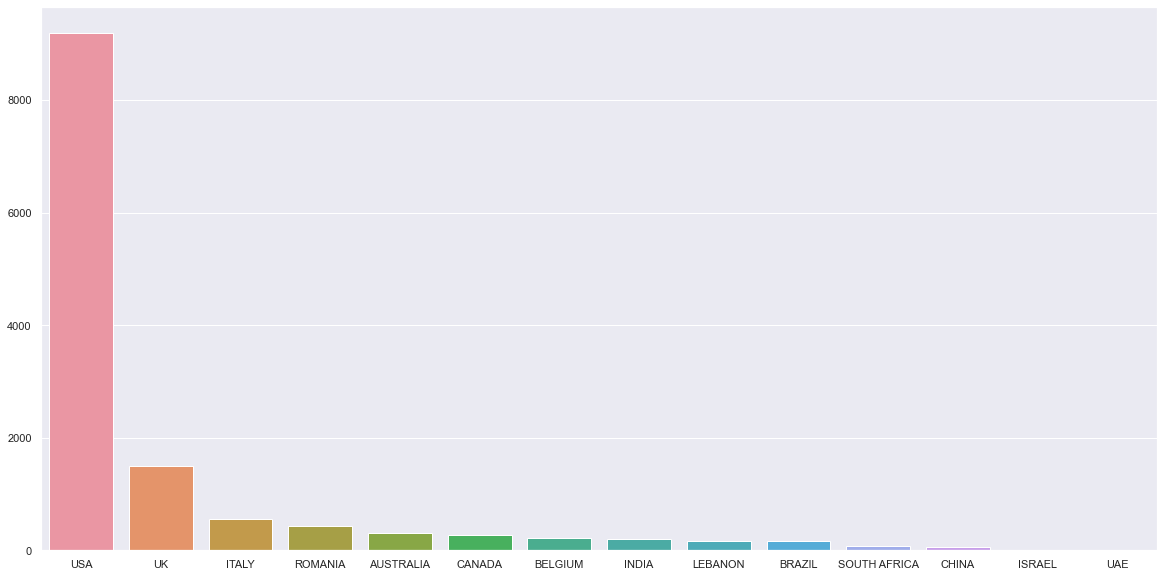

In [14]:
CountryName= sales_df.CountryName.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.barplot(x=CountryName.index, y=CountryName.values)
plt.show()

Looking at the total amount spent per country

In [15]:
grouped_CountryName = sales_df.groupby(['CountryName']).sum()
grouped_CountryName['avgprice_per_ft']=grouped_CountryName['Amount'] / grouped_CountryName['TotalArea']
grouped_CountryName.sort_values(['Amount'],ascending=False)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,avgprice_per_ft
CountryName,,,,,,
USA,482753,530066.8345000,27082868.0319160,540283.8552000,48766.8043000,51.0933080
UK,61828,12202.0250000,1965411.2275000,41641.9488000,3812.5060000,161.0725455
ITALY,5468,2434.7624000,563098.8478000,26079.3563000,2412.0124000,231.2746606
BELGIUM,11461,824.2337000,426791.4104840,8378.1373000,778.1517000,517.8038832
ROMANIA,7501,1508.6320000,426626.0484000,16281.9406000,1508.6320000,282.7900034
AUSTRALIA,3171,2204.1671000,356938.8640000,19564.9582000,1806.6915000,161.9382051
INDIA,5077,7695.9930000,147574.0000000,7695.9930000,699.5200000,19.1754332
SOUTH AFRICA,906,7069.0000000,130457.9900000,7069.0000000,637.8968000,18.4549427
CANADA,581,18878.0000000,116778.3000000,18878.0000000,1699.0200000,6.1859466


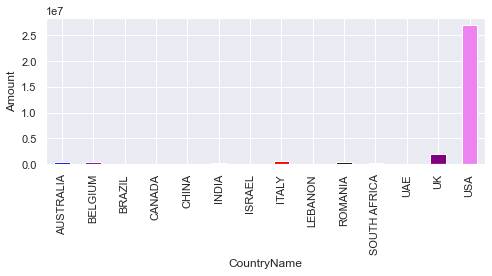

In [16]:
c = ['blue', 'purple', 'violet', 'turquoise', 'green', 'yellow', 'orange', 'red', 'brown', 'black', 'grey']
ax = sales_df.groupby(["CountryName"]).Amount.sum().plot(kind='bar', color=c, figsize=[7, 4]) 
ax.set_ylabel('Amount')
#ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

Looking at the average amount spent per country

In [17]:
grouped_CountryName = sales_df.groupby(['CountryName']).mean()
grouped_CountryName['avgprice_per_ft']=grouped_CountryName['Amount'] / grouped_CountryName['TotalArea']
grouped_CountryName.sort_values(['Amount'],ascending=False)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,avgprice_per_ft
CountryName,,,,,,
UAE,388.0000000,3.6800000,22117.0000000,39.8125000,3.6800000,6010.0543478
USA,52.4959765,57.6410216,2945.0704689,58.7520504,5.3030453,51.0933080
ISRAEL,189.8750000,2.9106500,2141.1094000,31.5772625,2.9106500,735.6121141
BELGIUM,53.5560748,3.8515593,1994.3523854,39.1501743,3.6362229,517.8038832
SOUTH AFRICA,10.7857143,84.1547619,1553.0713095,84.1547619,7.5940095,18.4549427
UK,41.4674715,8.1837860,1318.1832512,27.9288724,2.5570127,161.0725455
AUSTRALIA,10.5348837,7.3228143,1185.8434020,64.9998611,6.0022973,161.9382051
ITALY,9.9237750,4.4188065,1021.9579815,47.3309552,4.3775180,231.2746606
ROMANIA,17.2041284,3.4601651,978.5001110,37.3439005,3.4601651,282.7900034


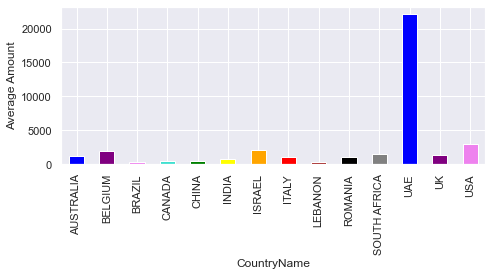

In [18]:
c = ['blue', 'purple', 'violet', 'turquoise', 'green', 'yellow', 'orange', 'red', 'brown', 'black', 'grey']
ax = sales_df.groupby(["CountryName"]).Amount.mean().plot(kind='bar', color=c, figsize=[7, 4]) 
ax.set_ylabel('Average Amount')
#ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The TotalArea of each country

In [19]:
grouped_CountryName = sales_df.groupby(['CountryName']).sum()
grouped_CountryName['avgprice_per_ft']=grouped_CountryName['Amount'] / grouped_CountryName['TotalArea']
grouped_CountryName.sort_values(['TotalArea'],ascending=False)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,avgprice_per_ft
CountryName,,,,,,
USA,482753,530066.8345000,27082868.0319160,540283.8552000,48766.8043000,51.0933080
CANADA,581,18878.0000000,116778.3000000,18878.0000000,1699.0200000,6.1859466
UK,61828,12202.0250000,1965411.2275000,41641.9488000,3812.5060000,161.0725455
INDIA,5077,7695.9930000,147574.0000000,7695.9930000,699.5200000,19.1754332
SOUTH AFRICA,906,7069.0000000,130457.9900000,7069.0000000,637.8968000,18.4549427
BRAZIL,438,3852.0790000,59877.2660000,23186.1450000,2145.1813000,15.5441428
ITALY,5468,2434.7624000,563098.8478000,26079.3563000,2412.0124000,231.2746606
AUSTRALIA,3171,2204.1671000,356938.8640000,19564.9582000,1806.6915000,161.9382051
ROMANIA,7501,1508.6320000,426626.0484000,16281.9406000,1508.6320000,282.7900034


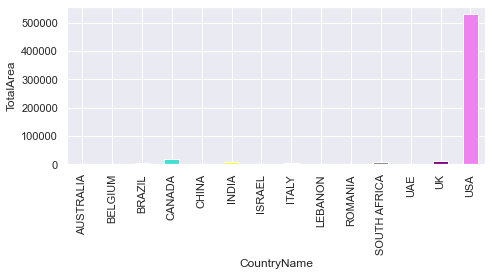

In [20]:
c = ['blue', 'purple', 'violet', 'turquoise', 'green', 'yellow', 'orange', 'red', 'brown', 'black', 'grey']
ax = sales_df.groupby(["CountryName"]).TotalArea.sum().plot(kind='bar', color=c, figsize=[7, 4]) 
ax.set_ylabel('TotalArea')
#ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

# EDA based on ItemName and customers

In [21]:
#get the top 5 buyer for each item in term of TotalArea

item_name_lst=['HAND TUFTED', 'HANDWOVEN', 'DURRY', '-', 'GUN TUFTED',
       'INDO-TIBBETAN', 'DOUBLE BACK', 'JACQUARD', 'KNOTTED', 'HANDLOOM',
       'POWER LOOM JACQUARD', 'TABLE TUFTED']
for i in item_name_lst:
    print(f"{i} order dy TotalArea")
    df1=sales_df[sales_df['ITEM_NAME']== i].groupby('CustomerCode').sum()
    df2=df1.sort_values('TotalArea',ascending=False)
    df2['avgprice_per_ft'] = df2['Amount'] / df2['TotalArea']
    print(df2.head(5))
    print()
    

HAND TUFTED order dy TotalArea
              QtyRequired     TotalArea           Amount        AreaFt  \
CustomerCode                                                             
C-1                  4176 51599.0555000   454005.3034640 51599.0555000   
TGT                 15045 37630.3318000 11341052.5133400 37630.3318000   
A-9                 11716 24320.8850000   959040.2500000 26028.5000000   
H-2                 26612 15056.0625000  2458060.8000000 15056.0625000   
M-1                  2697 11572.0000000   133665.2500000 11572.0000000   

                  AreaMtr  avgprice_per_ft  
CustomerCode                                
C-1          4655.0680000        8.7987134  
TGT          3420.5622000      301.3806143  
A-9          2342.6766000       39.4327859  
H-2          1355.1473000      163.2605338  
M-1          1041.4800000       11.5507475  

HANDWOVEN order dy TotalArea
              QtyRequired     TotalArea         Amount        AreaFt  \
CustomerCode                     

In [22]:
#get the top 5 buyer for each item_name in term of Amount

item_name_lst=['HAND TUFTED', 'HANDWOVEN', 'DURRY', '-', 'GUN TUFTED',
       'INDO-TIBBETAN', 'DOUBLE BACK', 'JACQUARD', 'KNOTTED', 'HANDLOOM',
       'POWER LOOM JACQUARD', 'TABLE TUFTED']
for i in item_name_lst:
    print(f"{i} order dy Amount")
    df1=sales_df[sales_df['ITEM_NAME']== i].groupby('CustomerCode').sum()
    df2=df1.sort_values('Amount',ascending=False)
    df2['avgprice_per_ft'] = df2['Amount'] / df2['TotalArea']
    print(df2.head(5))
    print()
    

HAND TUFTED order dy Amount
              QtyRequired     TotalArea           Amount        AreaFt  \
CustomerCode                                                             
TGT                 15045 37630.3318000 11341052.5133400 37630.3318000   
H-2                 26612 15056.0625000  2458060.8000000 15056.0625000   
A-9                 11716 24320.8850000   959040.2500000 26028.5000000   
C-1                  4176 51599.0555000   454005.3034640 51599.0555000   
N-1                 60685   208.0237000   384419.0857500  2084.8974000   

                  AreaMtr  avgprice_per_ft  
CustomerCode                                
TGT          3420.5622000      301.3806143  
H-2          1355.1473000      163.2605338  
A-9          2342.6766000       39.4327859  
C-1          4655.0680000        8.7987134  
N-1           194.3917000     1847.9581209  

HANDWOVEN order dy Amount
              QtyRequired     TotalArea         Amount        AreaFt  \
CustomerCode                           

In [23]:
#get the top 5 buyer for each item_name in term of price_per_ft

item_name_lst=['HAND TUFTED', 'HANDWOVEN', 'DURRY', '-', 'GUN TUFTED',
       'INDO-TIBBETAN', 'DOUBLE BACK', 'JACQUARD', 'KNOTTED', 'HANDLOOM',
       'POWER LOOM JACQUARD', 'TABLE TUFTED']
for i in item_name_lst:
    print(f"{i} order dy price_per_ft")
    df1=sales_df[sales_df['ITEM_NAME']== i].groupby('CustomerCode').sum()
    df1['avgprice_per_ft'] = df1['Amount'] / df1['TotalArea']
    df2=df1.sort_values('avgprice_per_ft',ascending=False)
    print(df2.head(30))
    print()
    

HAND TUFTED order dy price_per_ft
              QtyRequired     TotalArea           Amount        AreaFt  \
CustomerCode                                                             
N-1                 60685   208.0237000   384419.0857500  2084.8974000   
JL                   3544   437.4300000   194396.8350000  4750.0548000   
L-2                   153    45.8700000    15836.7350000   494.2082000   
I-2                  3657   725.8400000   220973.7104000  7827.1472000   
TGT                 15045 37630.3318000 11341052.5133400 37630.3318000   
C-2                  3816  1404.0000000   323829.9000000  1404.0000000   
T-2                  2636  1442.9873000   329284.6908000 15383.2688000   
RC                   1130   946.9006000   165113.4375000  5893.9515000   
H-2                 26612 15056.0625000  2458060.8000000 15056.0625000   
DR                     13     9.0900000      973.3050000    98.1042000   
T-4                  3667  2408.0000000   197676.0000000  2408.0000000   
CTS 

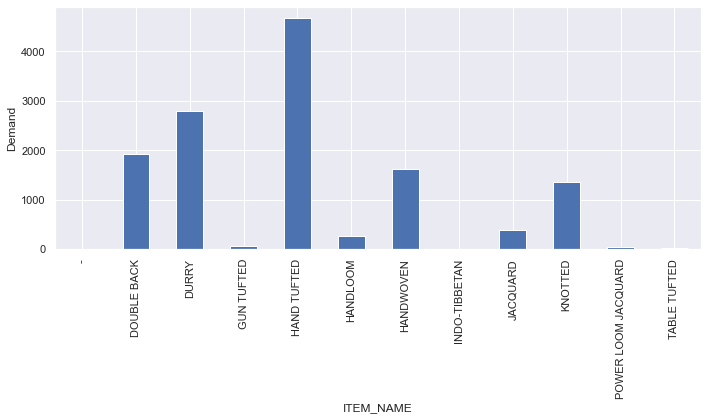

In [24]:
#Most popular ITEM_NAME term of QtyRequried
ax = sales_df.groupby('ITEM_NAME').count()['QtyRequired'].plot(kind='bar', figsize=[10, 6])
ax.set_ylabel('Demand')


plt.tight_layout()
plt.show()

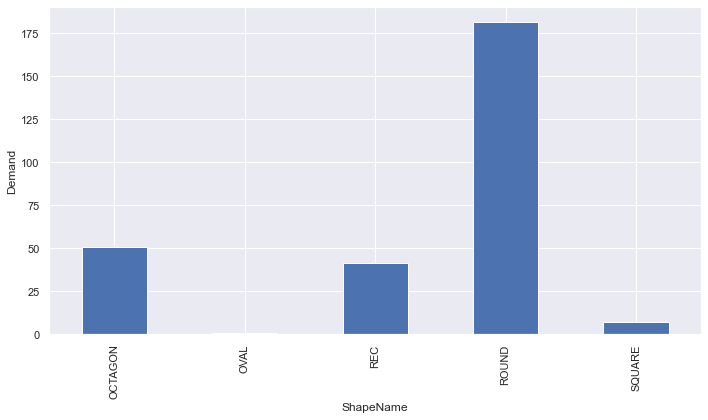

In [25]:
#Exploring the shape in term of QtyRequired
ax = sales_df.groupby('ShapeName').mean()['QtyRequired'].plot(kind='bar', figsize=[10, 6])
ax.set_ylabel('Demand')


plt.tight_layout()
plt.show()

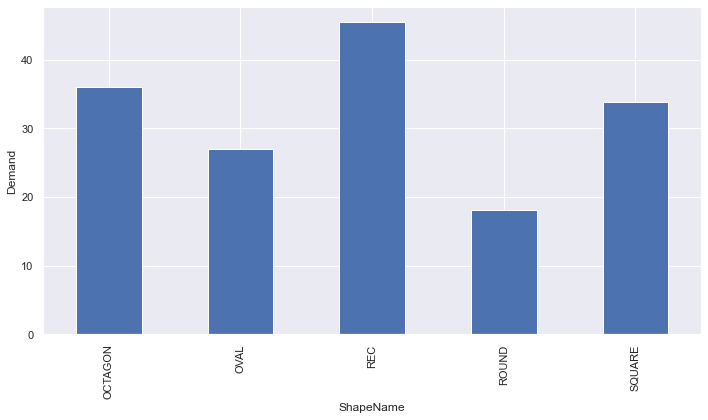

In [26]:
#Exploring the shape in term of TotalArea
ax = sales_df.groupby('ShapeName').mean()['TotalArea'].plot(kind='bar', figsize=[10, 6])
ax.set_ylabel('Demand')


plt.tight_layout()
plt.show()

In [27]:
#Exploring the color preferences
#Top 10 most frequently ordered colorname in term of order records
sales_df['ColorName'].value_counts(normalize=True).head(10)

MULTI      0.0738485
GREY       0.0612105
BLUE       0.0443852
SILVER     0.0408831
BEIGE      0.0237533
NAVY       0.0212410
IVORY      0.0201751
NATURAL    0.0197944
CHARCOAL   0.0190331
INDIGO     0.0176627
Name: ColorName, dtype: float64

The top 10 highest amount of customer

In [28]:
grouped_CustomerCode = sales_df.groupby(['CustomerCode']).sum()
grouped_CustomerCode['avgprice_per_ft']=grouped_CustomerCode['Amount'] / grouped_CustomerCode['TotalArea']
grouped_CustomerCode.sort_values(['Amount'],ascending=False).head(10)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,avgprice_per_ft
CustomerCode,,,,,,
TGT,15045,37630.3318000,11341052.5133400,37630.3318000,3420.5622000,301.3806143
H-2,183206,19505.3958000,3804801.2957000,19505.3958000,1756.7906000,195.0640394
P-5,48373,79666.7905000,3066518.2278920,79698.1405000,7183.5158000,38.4918008
M-1,16649,209725.2220000,1959794.0300200,209725.2220000,18907.1236000,9.3445796
A-9,18923,53625.6544000,1592079.7900000,56266.7776000,5064.1216000,29.6887713
C-2,55172,9510.0000000,1557123.0000000,9510.0000000,855.9000000,163.7353312
JL,18861,2980.6500000,1231578.2775000,32420.5738000,2980.6500000,413.1911756
N-1,72888,919.6505000,949375.6757500,3182.8978000,296.4773000,1032.3222526
T-5,42967,9221.3750000,733832.9500000,9221.3750000,831.8560000,79.5795584


The top 10 highest TotalArea customer

In [29]:
grouped_CustomerCode = sales_df.groupby(['CustomerCode']).sum()
grouped_CustomerCode['avgprice_per_ft']=grouped_CustomerCode['Amount'] / grouped_CustomerCode['TotalArea']
grouped_CustomerCode.sort_values(['TotalArea'],ascending=False).head(10)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,avgprice_per_ft
CustomerCode,,,,,,
M-1,16649,209725.2220000,1959794.0300200,209725.2220000,18907.1236000,9.3445796
P-5,48373,79666.7905000,3066518.2278920,79698.1405000,7183.5158000,38.4918008
C-1,5137,62763.0555000,567620.7209640,62763.0555000,5664.0957000,9.0438669
A-9,18923,53625.6544000,1592079.7900000,56266.7776000,5064.1216000,29.6887713
TGT,15045,37630.3318000,11341052.5133400,37630.3318000,3420.5622000,301.3806143
H-2,183206,19505.3958000,3804801.2957000,19505.3958000,1756.7906000,195.0640394
E-2,581,18878.0000000,116778.3000000,18878.0000000,1699.0200000,6.1859466
C-2,55172,9510.0000000,1557123.0000000,9510.0000000,855.9000000,163.7353312
H-1,1137,9327.0625000,65383.7950000,9327.0625000,841.6621000,7.0101165


Order by Amount in term of ITEM_NAME

In [30]:

grouped_item = sales_df.groupby(['ITEM_NAME']).sum()
grouped_item['price_per_ft'] = grouped_item['Amount'] / grouped_item['TotalArea']
grouped_item.sort_values(['Amount'],ascending=False)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,price_per_ft
ITEM_NAME,,,,,,
HAND TUFTED,164288,195305.0495000,18504515.2700040,230565.7205000,20912.6474000,94.7467324
DURRY,319635,79552.2899000,5601134.4057920,114441.4166000,10401.2607000,70.4082109
KNOTTED,16459,87138.1218000,2196894.0736700,99814.9368000,9024.4551000,25.2116299
HANDWOVEN,39046,73885.4358000,1990592.7926000,90011.7700000,8146.7506000,26.9416127
DOUBLE BACK,18356,122285.1401000,1675588.3247500,140355.6842000,12712.8813000,13.7023053
HANDLOOM,8349,7901.1122000,746930.0835840,13574.8612000,1238.4006000,94.5348028
JACQUARD,4024,18594.1267000,461568.1300000,24451.9996000,2216.4842000,24.8233293
TABLE TUFTED,3564,729.0000000,132259.2000000,729.0000000,65.6100000,181.4255144
POWER LOOM JACQUARD,9753,481.8750000,84299.2500000,481.8750000,43.7112000,174.9400778


Order by TotalArea in term of ITEM_NAME

In [31]:
grouped_item.sort_values(['TotalArea'],ascending=False)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,price_per_ft
ITEM_NAME,,,,,,
HAND TUFTED,164288,195305.0495000,18504515.2700040,230565.7205000,20912.6474000,94.7467324
DOUBLE BACK,18356,122285.1401000,1675588.3247500,140355.6842000,12712.8813000,13.7023053
KNOTTED,16459,87138.1218000,2196894.0736700,99814.9368000,9024.4551000,25.2116299
DURRY,319635,79552.2899000,5601134.4057920,114441.4166000,10401.2607000,70.4082109
HANDWOVEN,39046,73885.4358000,1990592.7926000,90011.7700000,8146.7506000,26.9416127
JACQUARD,4024,18594.1267000,461568.1300000,24451.9996000,2216.4842000,24.8233293
HANDLOOM,8349,7901.1122000,746930.0835840,13574.8612000,1238.4006000,94.5348028
GUN TUFTED,366,1547.6721000,21591.4600000,2505.5485000,229.9838000,13.9509267
TABLE TUFTED,3564,729.0000000,132259.2000000,729.0000000,65.6100000,181.4255144


Order by Amount in term of ITEM_NAME

In [32]:
grouped_item.sort_values(['Amount'],ascending=False)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,price_per_ft
ITEM_NAME,,,,,,
HAND TUFTED,164288,195305.0495000,18504515.2700040,230565.7205000,20912.6474000,94.7467324
DURRY,319635,79552.2899000,5601134.4057920,114441.4166000,10401.2607000,70.4082109
KNOTTED,16459,87138.1218000,2196894.0736700,99814.9368000,9024.4551000,25.2116299
HANDWOVEN,39046,73885.4358000,1990592.7926000,90011.7700000,8146.7506000,26.9416127
DOUBLE BACK,18356,122285.1401000,1675588.3247500,140355.6842000,12712.8813000,13.7023053
HANDLOOM,8349,7901.1122000,746930.0835840,13574.8612000,1238.4006000,94.5348028
JACQUARD,4024,18594.1267000,461568.1300000,24451.9996000,2216.4842000,24.8233293
TABLE TUFTED,3564,729.0000000,132259.2000000,729.0000000,65.6100000,181.4255144
POWER LOOM JACQUARD,9753,481.8750000,84299.2500000,481.8750000,43.7112000,174.9400778


Order by price_per_ft in term of ITEM_NAME

In [33]:
grouped_item.sort_values(['price_per_ft'],ascending=False)

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr,price_per_ft
ITEM_NAME,,,,,,
TABLE TUFTED,3564,729.0000000,132259.2000000,729.0000000,65.6100000,181.4255144
POWER LOOM JACQUARD,9753,481.8750000,84299.2500000,481.8750000,43.7112000,174.9400778
HAND TUFTED,164288,195305.0495000,18504515.2700040,230565.7205000,20912.6474000,94.7467324
HANDLOOM,8349,7901.1122000,746930.0835840,13574.8612000,1238.4006000,94.5348028
INDO-TIBBETAN,32,38.9800000,3571.1600000,382.7708000,35.3400000,91.6151873
DURRY,319635,79552.2899000,5601134.4057920,114441.4166000,10401.2607000,70.4082109
HANDWOVEN,39046,73885.4358000,1990592.7926000,90011.7700000,8146.7506000,26.9416127
KNOTTED,16459,87138.1218000,2196894.0736700,99814.9368000,9024.4551000,25.2116299
JACQUARD,4024,18594.1267000,461568.1300000,24451.9996000,2216.4842000,24.8233293


Take a closer look on TGT -- The customer with highest sales amount

In [34]:
TGT = sales_df[sales_df['CustomerCode'] == 'TGT']
TGT.head(5)

,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr
7736,TGT,USA,28,108.0000000,599719.6800000,HAND TUFTED,TUFTED 52C 2PLY WOOL ALL LOOP,9604 HT PURPLE (2836),PURPLE,REC,108.0000000,9.7200000
7737,TGT,USA,28,108.0000000,582331.6800000,HAND TUFTED,TUFTED 52C WOOL+VISC 2/15 5PLY LOOP/CUT,9634 HT GREY (3940),GREY,REC,108.0000000,9.7200000
7738,TGT,USA,28,108.0000000,582331.6800000,HAND TUFTED,TUFTED 52C WOOL ALL LOOP,9503 HT NAVY (2853),NAVY,REC,108.0000000,9.7200000
7739,TGT,USA,19,108.0000000,406952.6400000,HAND TUFTED,TUFTED 52C 2PLY WOOL ALL LOOP,9604 HT STONE GREY (5059),STONE GREY,REC,108.0000000,9.7200000
7740,TGT,USA,19,108.0000000,406952.6400000,HAND TUFTED,TUFTED 52C 2PLY WOOL ALL LOOP,9604 HT TEAL (2844),TEAL,REC,108.0000000,9.7200000


In [35]:
TGT['DesignName'].value_counts(normalize=True)  

9872 HT GREY (3788)              0.0229885
9872 HT TAN (1953)               0.0213465
9872 HT BLUE (1947)              0.0213465
9604 HT TEAL (2840)              0.0213465
9604 HT STONE GREY (5057)        0.0213465
9503 HT NAVY (2851)              0.0213465
9940 HT IVORY (5233)             0.0197044
9503 HT GREY (2560)              0.0197044
9872 HT BLUE (3673)              0.0197044
9503 HT NEUTRAL (2556)           0.0197044
9872 HT BLUSH PINK (3833)        0.0197044
9503 HT GREY (2559)              0.0197044
9402 HT CREAM (4018)             0.0197044
9872 HT GREY (1956)              0.0180624
9634 HT GREY (3893)              0.0180624
9604 HT PURPLE (2821)            0.0180624
9503 HT BLUSH PINK (2562)        0.0180624
9872 HT BLUE (3695)              0.0180624
9872 HT TAN (3771)               0.0164204
9872 HT TAN (3770)               0.0164204
9634 HT NEUTRAL (3950)           0.0164204
9402 HT PINK (4304)              0.0164204
9872 HT GREY (3818)              0.0164204
9872 HT TAN

In [36]:
TGT['ColorName'].value_counts(normalize=True) 

GREY              0.1937603
NEUTRAL           0.1149425
BLUSH PINK        0.1050903
BLUE              0.0755337
TAN               0.0706076
TEAL              0.0492611
NAVY              0.0476190
STONE GREY        0.0476190
IVORY             0.0410509
PURPLE            0.0394089
PINK              0.0394089
CREAM             0.0328407
LT.GREY           0.0262726
DK.GREY           0.0246305
PRAIRIE A         0.0246305
BLACK             0.0229885
MULTI FLORAL      0.0180624
SILVER/CHARCOAL   0.0131363
CREAM/CHARCOAL    0.0131363
Name: ColorName, dtype: float64

In [37]:
TGT['ShapeName'].value_counts(normalize=True) 

REC   1.0000000
Name: ShapeName, dtype: float64

# Loading & Normalizing Customer Data

In [38]:
#Load the customer data
customer_df=pd.read_csv('CustomerData.csv')
customer_df.head()

,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
0,A-11,2466,139.5900000,185404.1000000,1021,1445,0,0,0,0,0,0,0,0
1,A-6,131,2086.0000000,6247.4600000,0,0,25,106,0,0,0,0,0,0
2,A-9,18923,53625.6544000,1592079.7900000,3585,0,175,714,11716,2116,617,0,0,0
3,B-2,624,202.8987000,14811.1591000,581,0,0,2,0,41,0,0,0,0
4,B-3,464,8451.5625000,58626.8650000,0,0,459,5,0,0,0,0,0,0


In [39]:
customer_df.isna().sum()

Row Labels            0
Sum of QtyRequired    0
Sum of TotalArea      0
Sum of Amount         0
DURRY                 0
HANDLOOM              0
DOUBLE BACK           0
JACQUARD              0
HAND TUFTED           0
HAND WOVEN            0
KNOTTED               0
GUN TUFTED            0
Powerloom Jacquard    0
INDO TEBETAN          0
dtype: int64

In [40]:
#set row names (index) to the utilities column (company) and remove it. 
customer_df.set_index('Row Labels', inplace=True)

# Convert all columns to 'float'. While this step is not required, the conversion of integer data to float will avoid a warning when 
# applying the scale function
customer_df = customer_df.apply(lambda x: x.astype('float64')) #lambda is used for custom functions. 
customer_df.head()

,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
Row Labels,,,,,,,,,,,,,
A-11,2466.0000000,139.5900000,185404.1000000,1021.0000000,1445.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
A-6,131.0000000,2086.0000000,6247.4600000,0.0000000,0.0000000,25.0000000,106.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
A-9,18923.0000000,53625.6544000,1592079.7900000,3585.0000000,0.0000000,175.0000000,714.0000000,11716.0000000,2116.0000000,617.0000000,0.0000000,0.0000000,0.0000000
B-2,624.0000000,202.8987000,14811.1591000,581.0000000,0.0000000,0.0000000,2.0000000,0.0000000,41.0000000,0.0000000,0.0000000,0.0000000,0.0000000
B-3,464.0000000,8451.5625000,58626.8650000,0.0000000,0.0000000,459.0000000,5.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [41]:
# Normalize the data columns
customer_df_norm = (customer_df - customer_df.mean()) / customer_df.std()
customer_df_norm.head()

,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
Row Labels,,,,,,,,,,,,,
A-11,-0.3440687,-0.3746862,-0.2834784,-0.2744519,2.0726670,-0.3495816,-0.5086680,-0.3681241,-0.3587976,-0.2433430,-0.2384453,-0.1490712,-0.2066061
A-6,-0.4204990,-0.3182263,-0.3825159,-0.3205248,-0.3053267,-0.3281565,0.0943008,-0.3681241,-0.3587976,-0.2433430,-0.2384453,-0.1490712,-0.2066061
A-9,0.1946088,1.1767957,0.4941300,-0.1587507,-0.3053267,-0.1996059,3.5528389,0.8132305,0.5161885,0.1671570,-0.2384453,-0.1490712,-0.2066061
B-2,-0.4043619,-0.3728498,-0.3777819,-0.2943070,-0.3053267,-0.3495816,-0.4972913,-0.3681241,-0.3418437,-0.2433430,-0.2384453,-0.1490712,-0.2066061
B-3,-0.4095991,-0.1335790,-0.3535607,-0.3205248,-0.3053267,0.0437834,-0.4802261,-0.3681241,-0.3587976,-0.2433430,-0.2384453,-0.1490712,-0.2066061


# Trying Eucladean & Single Linkage

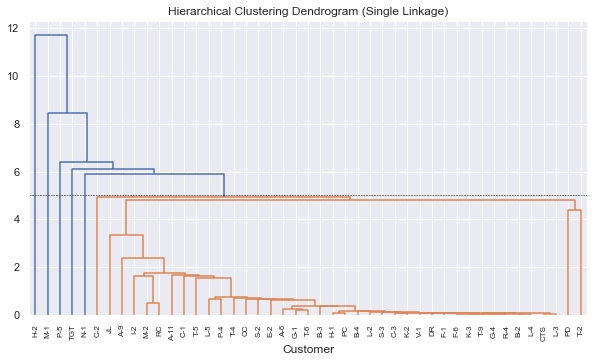

In [42]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customer_df_norm, method='single', metric = 'euclidean') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Customer')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customer_df_norm.index, color_threshold=5)
plt.axhline(y=5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [43]:
memb = fcluster(Z, 6, criterion='maxclust') #no more than 6 clusters
print(memb)

#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customer_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 5 1 2 1 4 1 1 1 1 1
 1 1 1 1 1 1 3 1]
1 :  A-11, A-6, A-9, B-2, B-3, B-4, C-1, C-2, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, I-2, JL, K-2, K-3, L-2, L-3, L-4, L-5, M-2, P-4, PC, PD, R-4, RC, S-2, S-3, T-2, T-4, T-5, T-6, T-9, V-1
2 :  N-1
3 :  TGT
4 :  P-5
5 :  M-1
6 :  H-2


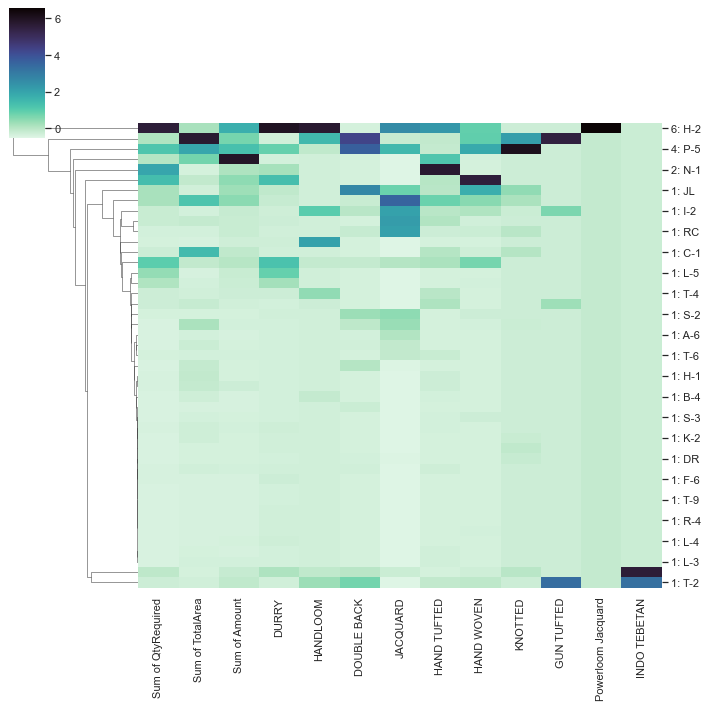

In [44]:
#Add the membership number, that is, the cluster number to the index
customer_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customer_df.index)]

#Cluster map (aka Heat map)
sns.clustermap(customer_df_norm, method='single', metric= 'euclidean', col_cluster=False,  cmap="mako_r") 
#mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

Means of Normalized Input Variables for Clusters with Single Linkage Method
   Sum of QtyRequired  Sum of TotalArea  Sum of Amount      DURRY   HANDLOOM  \
1          -0.2219858        -0.2046201     -0.2436528 -0.1610013 -0.1632642   
2           1.9610144        -0.3520589      0.1388441  0.2301389 -0.3053267   
3           0.0676725         0.7128159      5.8833489 -0.3205248 -0.3053267   
4           1.1585789         1.9321767      1.3091976  0.8525969 -0.0782242   
5           0.1201753         5.7048100      0.6974020 -0.3019332  1.4802257   
6           5.5719905         0.1870619      1.7173195  5.9797755  5.7392207   

   DOUBLE BACK   JACQUARD  HAND TUFTED  HAND WOVEN    KNOTTED  GUN TUFTED  \
1   -0.1733387 -0.0733644   -0.2246973  -0.0732589 -0.1879388  -0.1131149   
2   -0.3495816 -0.5086680    5.7509016  -0.3587976 -0.2433430  -0.2384453   
3   -0.3495816 -0.5086680    1.1489022  -0.3587976 -0.2433430  -0.2384453   
4    3.6706262  1.4993319   -0.1309658   1.8493430  6.0

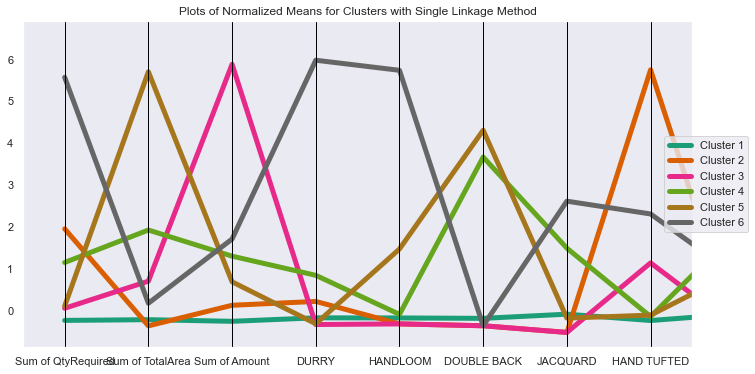

In [45]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customer_df_norm.index = customer_df.index
clust_mean_norm = customer_df_norm.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 

clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Means of Normalized Input Variables for Clusters with Single Linkage Method')
print(clust_mean_norm)

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Single Linkage Method')
plt.show()

# Trying Average Linkage Method

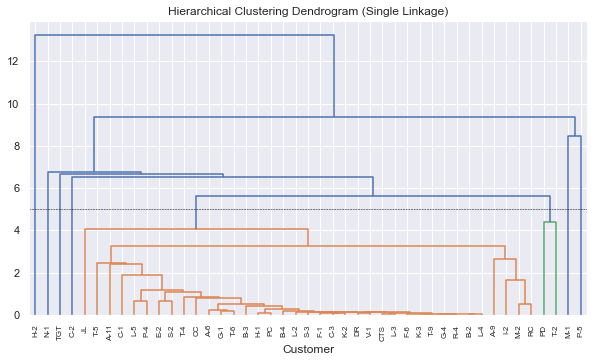

In [46]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customer_df_norm, method='average', metric = 'euclidean') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Customer')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customer_df_norm.index, color_threshold=5)
plt.axhline(y=5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [47]:
memb = fcluster(Z, 8, criterion='maxclust') #no more than 6 clusters
print(memb)

#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customer_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

[1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 6 1 5 1 7 1 2 1 1 1
 1 2 1 1 1 1 4 1]
1 :  A-11, A-6, A-9, B-2, B-3, B-4, C-1, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, I-2, JL, K-2, K-3, L-2, L-3, L-4, L-5, M-2, P-4, PC, R-4, RC, S-2, S-3, T-4, T-5, T-6, T-9, V-1
2 :  PD, T-2
3 :  C-2
4 :  TGT
5 :  N-1
6 :  M-1
7 :  P-5
8 :  H-2


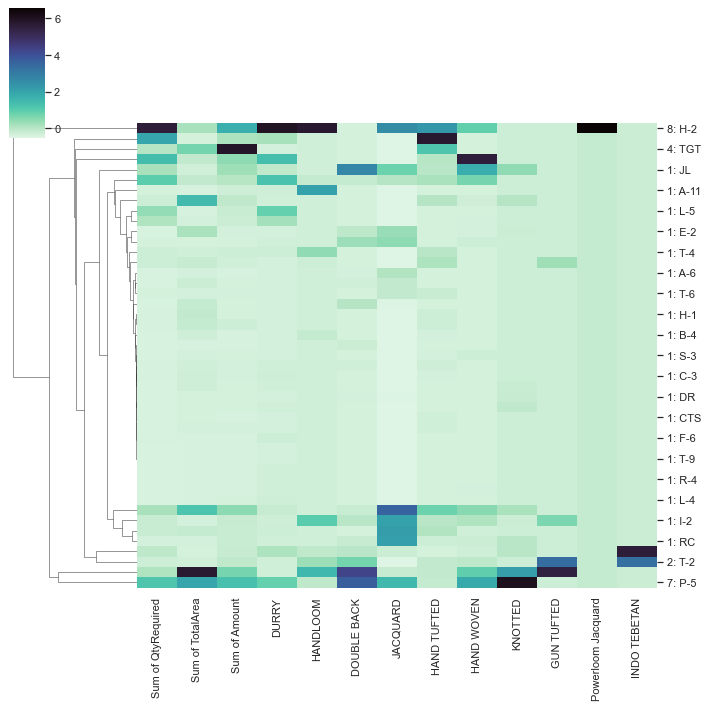

In [48]:
#Add the membership number, that is, the cluster number to the index
customer_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customer_df.index)]

#Cluster map (aka Heat map)
sns.clustermap(customer_df_norm, method='average', metric= 'euclidean', col_cluster=False,  cmap="mako_r") 
#mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

Means of Normalized Input Variables for Clusters with Average Linkage Method
   Sum of QtyRequired  Sum of TotalArea  Sum of Amount      DURRY   HANDLOOM  \
1          -0.2690487        -0.2004355     -0.2698347 -0.2057432 -0.1752298   
2          -0.1528786        -0.3329072     -0.1185178 -0.0892804  0.1291303   
3           1.3811267        -0.1028767      0.4748060  1.3510055 -0.3053267   
4           0.0676725         0.7128159      5.8833489 -0.3205248 -0.3053267   
5           1.9610144        -0.3520589      0.1388441  0.2301389 -0.3053267   
6           0.1201753         5.7048100      0.6974020 -0.3019332  1.4802257   
7           1.1585789         1.9321767      1.3091976  0.8525969 -0.0782242   
8           5.5719905         0.1870619      1.7173195  5.9797755  5.7392207   

   DOUBLE BACK   JACQUARD  HAND TUFTED  HAND WOVEN    KNOTTED  GUN TUFTED  \
1   -0.1974054 -0.0457565   -0.2306511  -0.2207301 -0.1904234  -0.1996200   
2    0.3600180 -0.3664584   -0.2352267  -0.16176

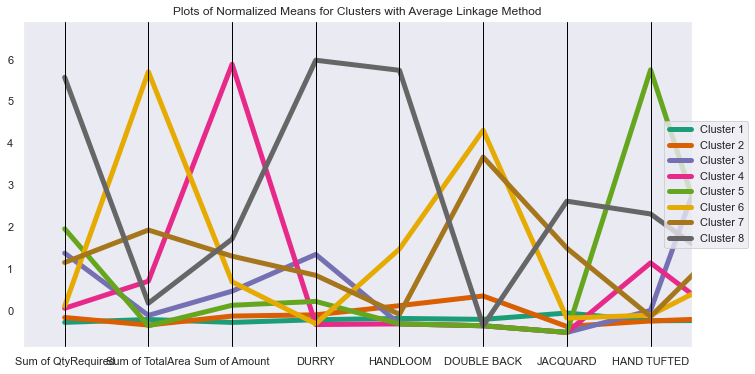

In [49]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customer_df_norm.index = customer_df.index
clust_mean_norm = customer_df_norm.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 

clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Means of Normalized Input Variables for Clusters with Average Linkage Method')
print(clust_mean_norm)

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()

# Trying Ward Method

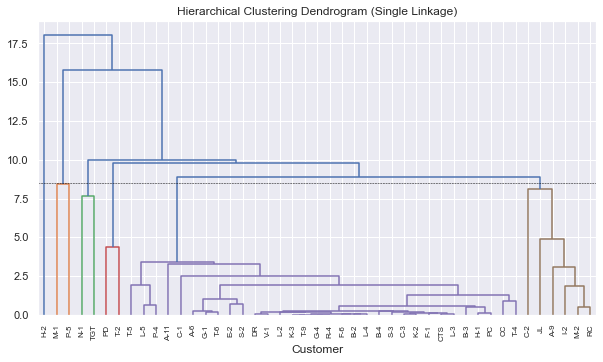

In [50]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customer_df_norm, method='ward', metric = 'euclidean') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Customer')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customer_df_norm.index, color_threshold=8.5)
plt.axhline(y=8.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [51]:
memb = fcluster(Z, 6, criterion='maxclust') #no more than 6 clusters
print(memb)

#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customer_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

[4 4 5 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 6 5 5 4 4 4 4 4 4 1 5 2 4 1 4 3 4 5 4
 4 3 4 4 4 4 2 4]
1 :  M-1, P-5
2 :  N-1, TGT
3 :  PD, T-2
4 :  A-11, A-6, B-2, B-3, B-4, C-1, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, K-2, K-3, L-2, L-3, L-4, L-5, P-4, PC, R-4, S-2, S-3, T-4, T-5, T-6, T-9, V-1
5 :  A-9, C-2, I-2, JL, M-2, RC
6 :  H-2


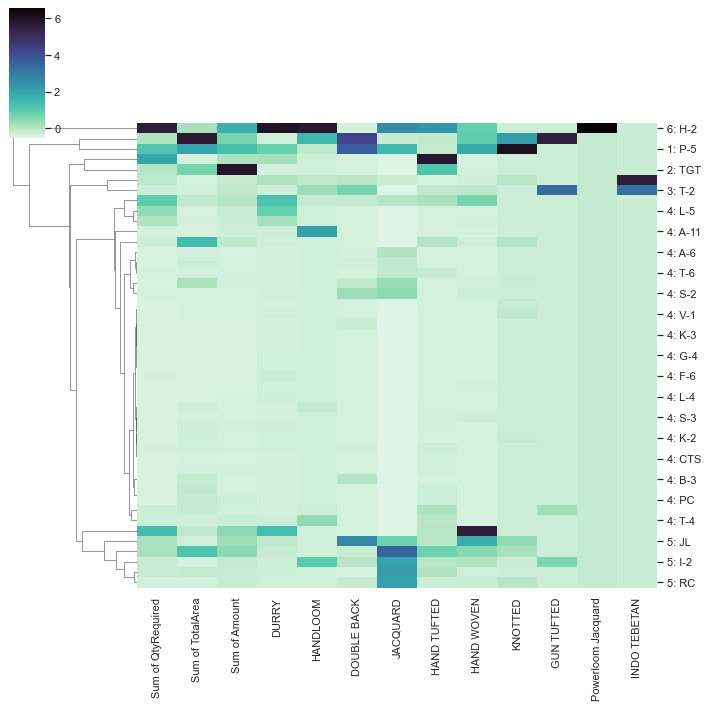

In [52]:
#Add the membership number, that is, the cluster number to the index
customer_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customer_df.index)]

#Cluster map (aka Heat map)
sns.clustermap(customer_df_norm, method='ward', metric= 'euclidean', col_cluster=False,  cmap="mako_r") 
#mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

Means of Normalized Input Variables for Clusters with Ward Linkage Method
   Sum of QtyRequired  Sum of TotalArea  Sum of Amount      DURRY   HANDLOOM  \
1           0.6393771         3.8184934      1.0032998  0.2753318  0.7010007   
2           1.0143434         0.1803785      3.0110965 -0.0451930 -0.3053267   
3          -0.1528786        -0.3329072     -0.1185178 -0.0892804  0.1291303   
4          -0.3012118        -0.2344101     -0.3192824 -0.2051099 -0.1954268   
5           0.1775171        -0.0029782      0.1179933  0.0503372 -0.0891953   
6           5.5719905         0.1870619      1.7173195  5.9797755  5.7392207   

   DOUBLE BACK   JACQUARD  HAND TUFTED  HAND WOVEN    KNOTTED  GUN TUFTED  \
1    3.9911459  0.6659835   -0.1135722   1.3831111  4.1237912   2.6199666   
2   -0.3495816 -0.5086680    3.4499019  -0.3587976 -0.2433430  -0.2384453   
3    0.3600180 -0.3664584   -0.2352267  -0.1617603 -0.1142717   1.5498945   
4   -0.2910375 -0.3877898   -0.2862606  -0.3135441 -0.224

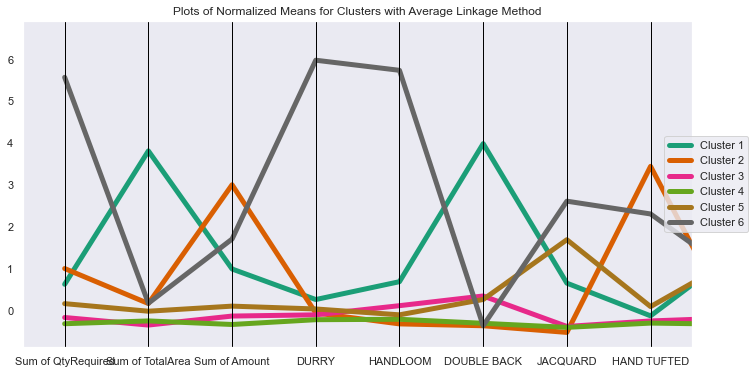

In [53]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customer_df_norm.index = customer_df.index
clust_mean_norm = customer_df_norm.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 

clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Means of Normalized Input Variables for Clusters with Ward Linkage Method')
print(clust_mean_norm)

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()

Try Wards Method with fewer clusters

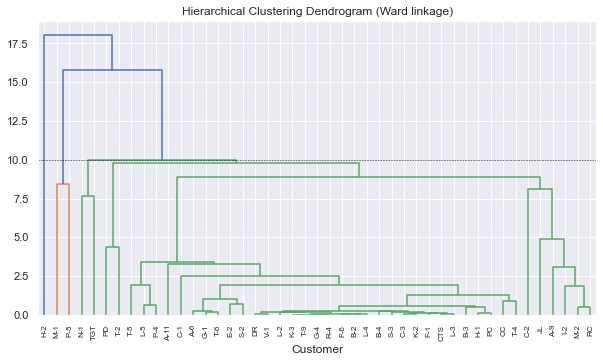

In [54]:
#Use one of the following methods: 'single', 'average','ward','complete','centroid'
Z = linkage(customer_df_norm, method='ward') 

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.2)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Customer')
# 'color_threshold = 2.5' represents the threthold of cluster development. 
# It is a normalized dinstance between clusters (2.5), at which the agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. 
dendrogram(Z, labels=customer_df_norm.index, color_threshold=10)
plt.axhline(y=10, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [55]:
memb = fcluster(Z, 3, criterion='maxclust') #no more than 6 clusters
print(memb)

#The above variable has membership of each row. To make it presentable we reorganize next
memb = pd.Series(memb, index=customer_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2]
1 :  M-1, P-5
2 :  A-11, A-6, A-9, B-2, B-3, B-4, C-1, C-2, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, I-2, JL, K-2, K-3, L-2, L-3, L-4, L-5, M-2, N-1, P-4, PC, PD, R-4, RC, S-2, S-3, T-2, T-4, T-5, T-6, T-9, TGT, V-1
3 :  H-2


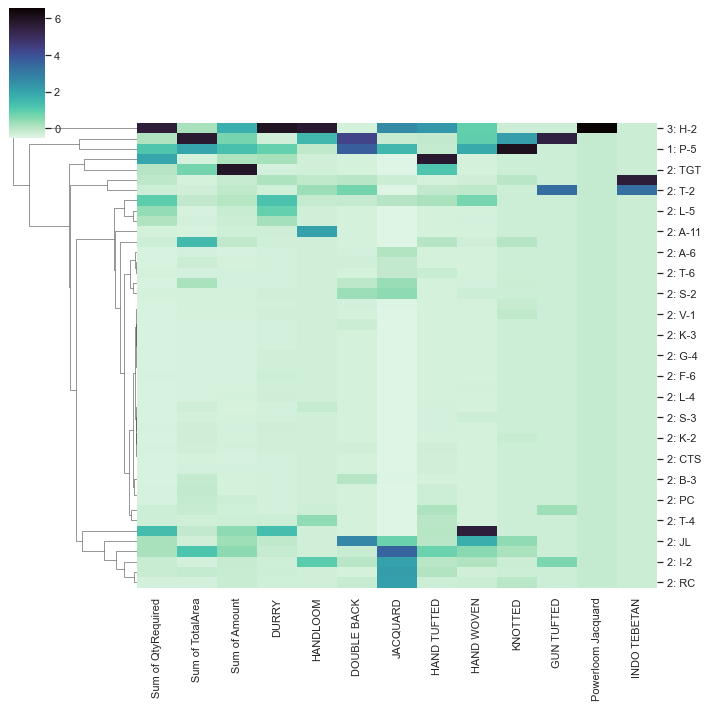

In [56]:
#Add the membership number, that is, the cluster number to the index
customer_df_norm.index = ['{}: {}'.format(cluster, customer) for cluster, customer in zip(memb, customer_df.index)]

#Cluster map (aka Heat map)
sns.clustermap(customer_df_norm, method='ward', metric= 'euclidean', col_cluster=False,  cmap="mako_r") 
#mako_r is a commonly used color palette for Heatmaps. 'rocket' is another common one
plt.show()

Means of Normalized Input Variables for Clusters with Ward Linkage Method
   Sum of QtyRequired  Sum of TotalArea  Sum of Amount      DURRY   HANDLOOM  \
1           0.6393771         3.8184934      1.0032998  0.2753318  0.7010007   
2          -0.1631130        -0.1862869     -0.0886647 -0.1554866 -0.1700291   
3           5.5719905         0.1870619      1.7173195  5.9797755  5.7392207   

   DOUBLE BACK   JACQUARD  HAND TUFTED  HAND WOVEN    KNOTTED  GUN TUFTED  \
1    3.9911459  0.6659835   -0.1135722   1.3831111  4.1237912   2.6199666   
2   -0.1817312 -0.0940931   -0.0497164  -0.0868560 -0.1905771  -0.1190830   
3   -0.3495816  2.6199437    2.3152328   0.8817308 -0.2433430  -0.2384453   

   Powerloom Jacquard  INDO TEBETAN    Cluster  
1          -0.1490712    -0.2066061  Cluster 1  
2          -0.1490712     0.0147576  Cluster 2  
3           6.5591327    -0.2066061  Cluster 3  


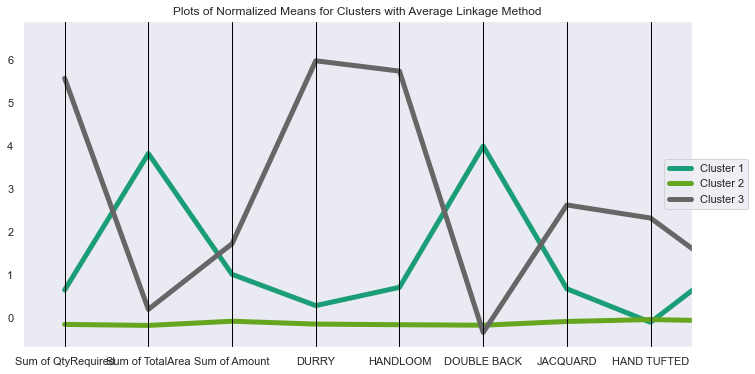

In [57]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
customer_df_norm.index = customer_df.index
clust_mean_norm = customer_df_norm.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 

clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Means of Normalized Input Variables for Clusters with Ward Linkage Method')
print(clust_mean_norm)

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()

# K-Mean Analysis

C:\Users\wendy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


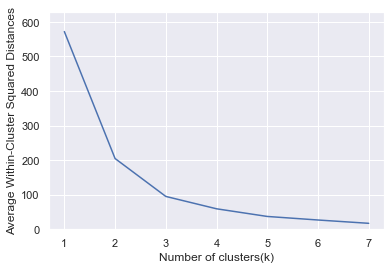

In [58]:
inertia = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(customer_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 8), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

C:\Users\wendy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


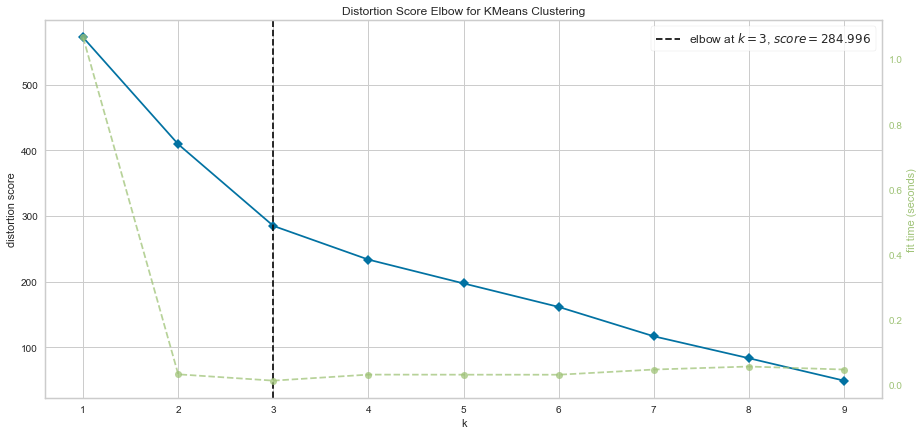

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(customer_df_norm)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [60]:
#Apply kMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(customer_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=customer_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  A-11, A-6, A-9, B-2, B-3, B-4, C-1, C-2, C-3, CC, CTS, DR, E-2, F-1, F-6, G-1, G-4, H-1, I-2, JL, K-2, K-3, L-2, L-3, L-4, L-5, M-2, N-1, P-4, PC, R-4, RC, S-2, S-3, T-4, T-5, T-6, T-9, TGT, V-1
1 :  M-1, P-5
2 :  H-2
3 :  PD, T-2


In [61]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=customer_df_norm.columns)

#Add 'Cluster number' column
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)
print(centroids)
#pd.set_option('display.precision', 3)

   Sum of QtyRequired  Sum of TotalArea  Sum of Amount      DURRY   HANDLOOM  \
0          -0.1636247        -0.1789559     -0.0871721 -0.1587970 -0.1849871   
1           0.6393771         3.8184934      1.0032998  0.2753318  0.7010007   
2           5.5719905         0.1870619      1.7173195  5.9797755  5.7392207   
3          -0.1528786        -0.3329072     -0.1185178 -0.0892804  0.1291303   

   DOUBLE BACK   JACQUARD  HAND TUFTED  HAND WOVEN    KNOTTED  GUN TUFTED  \
0   -0.2088187 -0.0804748   -0.0404409  -0.0831108 -0.1943924  -0.2025319   
1    3.9911459  0.6659835   -0.1135722   1.3831111  4.1237912   2.6199666   
2   -0.3495816  2.6199437    2.3152328   0.8817308 -0.2433430  -0.2384453   
3    0.3600180 -0.3664584   -0.2352267  -0.1617603 -0.1142717   1.5498945   

   Powerloom Jacquard  INDO TEBETAN    Cluster  
0          -0.1490712    -0.2066061  Cluster 0  
1          -0.1490712    -0.2066061  Cluster 1  
2           6.5591327    -0.2066061  Cluster 2  
3          -0.149

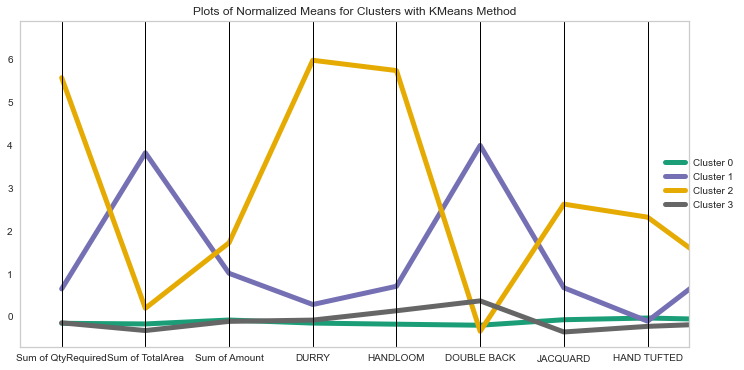

In [62]:
#Plot the means from kMeans clustering
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with KMeans Method')
plt.show()

In [63]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(customer_df_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=customer_df_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (40 members): 191.44 within cluster 
Cluster 1 (2 members): 35.74 within cluster 
Cluster 2 (1 members): 0.00 within cluster 
Cluster 3 (2 members): 9.70 within cluster 
